In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

plt.rcParams['figure.figsize'] = (12, 5)

In [5]:
def read_file(filename, name):
    elements = []
    blockSize = []
    bandwidth = []
    with open(filename) as file:
        for line in file:
            if line[0:len(name)] == name:
                bois = re.search(r'.*Num Elements:\s*(.+?), blockSize:\s*(.+?), Time for Reduction:\s*(.+?)ms, Bandwidth:\s*(.+?)GB/s', line)
                elements.append(bois.group(1))
                blockSize.append(bois.group(2))
                bandwidth.append(bois.group(4))

    data = np.zeros((len(elements), 3))
    data[:, 0] = elements
    data[:, 1] = blockSize
    data[:, 2] = bandwidth

    df = pd.DataFrame(data)
    df.columns = ['elements', 'blockSize', 'bandwidth']

    return df

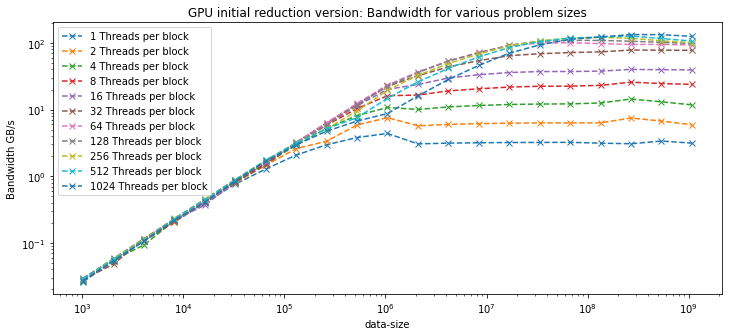

In [7]:
df_gpu_red = read_file('6_3.txt', '6:')

for thread_per_Block in [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]:
    data_for_block = df_gpu_red[df_gpu_red['blockSize'] == thread_per_Block]
    plt.plot(data_for_block['elements'], data_for_block['bandwidth'], marker='x', linestyle='--', label=f'{thread_per_Block} Threads per block')


plt.xlabel('data-size')
plt.ylabel('Bandwidth GB/s')
plt.yscale('log')
plt.xscale('log')
plt.title('GPU initial reduction version: Bandwidth for various problem sizes')
plt.legend(loc="upper left")
plt.savefig('gpu_reduction_initial.png')